This code reads in NED-D data, processes it, and creates a Decision Tree used to predict whether or not a data point will produce a Hubble Constant value.

The data processing removes columns of the data that do not help in understanding the Hubble constant such as ID's, code's, and notes.

The Decision Tree makes greedy splits on the data.

[ChatGPT was used to help in writing the code (Chat provided at the bottom of the code)]

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [87]:
data = pd.read_csv('NED_DATA.csv', skiprows=12)#,dtype=float,skiprows=12)
data.head(8) #showing first 8 values bc that is where the first NaN appears in 'Hubble const.'

,FRN,Exclusion Code,D,G,Galaxy ID,m-M,err,D (Mpc),Method,REFCODE,Unnamed: 10,Unnamed: 11,Hubble const.,Adopted LMC modulus,Date (Yr. - 1980)
0,NaN,1,1,SDSS-II SN 13651,41.64,0.17,1700.0,SNIa SDSS,2018PASP..130f4002S,SDSS-II SN 13651,0.249917,70.0,NaN,34.0,SDSS CAND. AGN; MLCS2K2
1,NaN,2,1,SDSS-II SN 13651,42.10,0.21,2110.0,SNIa SDSS,2018PASP..130f4002S,SDSS-II SN 13651,0.249917,70.0,NaN,34.0,SDSS CAND. AGN; SALT 2
2,NaN,999999,1,SDSS-II SN 13651,41.64,0.17,1700.0,SNIa SDSS,2018PASP..130f4002S,SDSS-II SN 13651,0.249917,70.0,NaN,34.0,"SDSS-II SN 13651, SDSS CAND. AGN; MLCS2K2"
3,NaN,999999,1,SDSS-II SN 13651,42.10,0.21,2110.0,SNIa SDSS,2018PASP..130f4002S,SDSS-II SN 13651,0.249917,70.0,NaN,34.0,"SDSS-II SN 13651, SDSS CAND. AGN; SALT 2"
4,NaN,3,2,2MASX J00000138+1530350,38.86,0.46,592.0,FP,2016A&A...596A..14S,NaN,NaN,70.0,NaN,36.0,NaN
5,NaN,4,3,2MASX J00000155-0929403,39.79,0.46,910.0,FP,2016A&A...596A..14S,NaN,NaN,70.0,NaN,36.0,NaN
6,NaN,5,4,UGC 12889,33.65,0.66,53.7,Tully-Fisher,1984A&AS...56..381B,NaN,NaN,103.0,NaN,4.0,Diameter
7,NaN,6,4,UGC 12889,34.16,0.40,68.0,Tully-Fisher,2007A&A...465...71T,NaN,NaN,NaN,NaN,27.0,mean


In [88]:
#Need to fix the errors in column headers

data.columns = data.columns[1:].tolist()+['Notes']
data.head(8)

,Exclusion Code,D,G,Galaxy ID,m-M,err,D (Mpc),Method,REFCODE,Unnamed: 10,Unnamed: 11,Hubble const.,Adopted LMC modulus,Date (Yr. - 1980),Notes
0,NaN,1,1,SDSS-II SN 13651,41.64,0.17,1700.0,SNIa SDSS,2018PASP..130f4002S,SDSS-II SN 13651,0.249917,70.0,NaN,34.0,SDSS CAND. AGN; MLCS2K2
1,NaN,2,1,SDSS-II SN 13651,42.10,0.21,2110.0,SNIa SDSS,2018PASP..130f4002S,SDSS-II SN 13651,0.249917,70.0,NaN,34.0,SDSS CAND. AGN; SALT 2
2,NaN,999999,1,SDSS-II SN 13651,41.64,0.17,1700.0,SNIa SDSS,2018PASP..130f4002S,SDSS-II SN 13651,0.249917,70.0,NaN,34.0,"SDSS-II SN 13651, SDSS CAND. AGN; MLCS2K2"
3,NaN,999999,1,SDSS-II SN 13651,42.10,0.21,2110.0,SNIa SDSS,2018PASP..130f4002S,SDSS-II SN 13651,0.249917,70.0,NaN,34.0,"SDSS-II SN 13651, SDSS CAND. AGN; SALT 2"
4,NaN,3,2,2MASX J00000138+1530350,38.86,0.46,592.0,FP,2016A&A...596A..14S,NaN,NaN,70.0,NaN,36.0,NaN
5,NaN,4,3,2MASX J00000155-0929403,39.79,0.46,910.0,FP,2016A&A...596A..14S,NaN,NaN,70.0,NaN,36.0,NaN
6,NaN,5,4,UGC 12889,33.65,0.66,53.7,Tully-Fisher,1984A&AS...56..381B,NaN,NaN,103.0,NaN,4.0,Diameter
7,NaN,6,4,UGC 12889,34.16,0.40,68.0,Tully-Fisher,2007A&A...465...71T,NaN,NaN,NaN,NaN,27.0,mean


In [89]:
data.rename(columns={'Unnamed: 11': 'redshift (z)', 'Unnamed: 10': 'SNID'}, inplace=True)
data.head(8)
#Now we fixed the dataframe

,Exclusion Code,D,G,Galaxy ID,m-M,err,D (Mpc),Method,REFCODE,SNID,redshift (z),Hubble const.,Adopted LMC modulus,Date (Yr. - 1980),Notes
0,NaN,1,1,SDSS-II SN 13651,41.64,0.17,1700.0,SNIa SDSS,2018PASP..130f4002S,SDSS-II SN 13651,0.249917,70.0,NaN,34.0,SDSS CAND. AGN; MLCS2K2
1,NaN,2,1,SDSS-II SN 13651,42.10,0.21,2110.0,SNIa SDSS,2018PASP..130f4002S,SDSS-II SN 13651,0.249917,70.0,NaN,34.0,SDSS CAND. AGN; SALT 2
2,NaN,999999,1,SDSS-II SN 13651,41.64,0.17,1700.0,SNIa SDSS,2018PASP..130f4002S,SDSS-II SN 13651,0.249917,70.0,NaN,34.0,"SDSS-II SN 13651, SDSS CAND. AGN; MLCS2K2"
3,NaN,999999,1,SDSS-II SN 13651,42.10,0.21,2110.0,SNIa SDSS,2018PASP..130f4002S,SDSS-II SN 13651,0.249917,70.0,NaN,34.0,"SDSS-II SN 13651, SDSS CAND. AGN; SALT 2"
4,NaN,3,2,2MASX J00000138+1530350,38.86,0.46,592.0,FP,2016A&A...596A..14S,NaN,NaN,70.0,NaN,36.0,NaN
5,NaN,4,3,2MASX J00000155-0929403,39.79,0.46,910.0,FP,2016A&A...596A..14S,NaN,NaN,70.0,NaN,36.0,NaN
6,NaN,5,4,UGC 12889,33.65,0.66,53.7,Tully-Fisher,1984A&AS...56..381B,NaN,NaN,103.0,NaN,4.0,Diameter
7,NaN,6,4,UGC 12889,34.16,0.40,68.0,Tully-Fisher,2007A&A...465...71T,NaN,NaN,NaN,NaN,27.0,mean


In [90]:
#I'm first going to drop columns that do not help such as Exclusion code, REFCODE, SNID, Adopted LMC modulus and Notes
'''reason for dropping each
Exclusion code - Tells us if the data is from sources incorporated with NED which is not going to tell us about the measurement
D - We want our decision tree to be based on methods and results not the actual objects
G - Same as D they both use a number to describe the object
REFCODE - Tells what paper the measurement is from
SN_ID - Only relevant for supernova measurements which is not all of our datapoints
Adopted LMC modulus - Similar to SNID only relevant to certain measurements
Notes - Extra infor about measurement not present in most
'''
data = data.drop(['Exclusion Code','D','G','REFCODE','SNID','Adopted LMC modulus','Notes'], axis=1)
#We are looking at whether or not there is a hubble const measurement so we don't want to remove those
data['Hubble const.'] = data['Hubble const.'].fillna(0.0)
data.head(8)

,Galaxy ID,m-M,err,D (Mpc),Method,redshift (z),Hubble const.,Date (Yr. - 1980)
0,SDSS-II SN 13651,41.64,0.17,1700.0,SNIa SDSS,0.249917,70.0,34.0
1,SDSS-II SN 13651,42.10,0.21,2110.0,SNIa SDSS,0.249917,70.0,34.0
2,SDSS-II SN 13651,41.64,0.17,1700.0,SNIa SDSS,0.249917,70.0,34.0
3,SDSS-II SN 13651,42.10,0.21,2110.0,SNIa SDSS,0.249917,70.0,34.0
4,2MASX J00000138+1530350,38.86,0.46,592.0,FP,NaN,70.0,36.0
5,2MASX J00000155-0929403,39.79,0.46,910.0,FP,NaN,70.0,36.0
6,UGC 12889,33.65,0.66,53.7,Tully-Fisher,NaN,103.0,4.0
7,UGC 12889,34.16,0.40,68.0,Tully-Fisher,NaN,0.0,27.0


In [91]:
data = data.dropna()
hubble = data['Hubble const.']
print(data.shape)
print(hubble.shape)
data.head(8)

(30116, 8)
(30116,)


,Galaxy ID,m-M,err,D (Mpc),Method,redshift (z),Hubble const.,Date (Yr. - 1980)
0,SDSS-II SN 13651,41.64,0.17,1700.0,SNIa SDSS,0.249917,70.0,34.0
1,SDSS-II SN 13651,42.10,0.21,2110.0,SNIa SDSS,0.249917,70.0,34.0
2,SDSS-II SN 13651,41.64,0.17,1700.0,SNIa SDSS,0.249917,70.0,34.0
3,SDSS-II SN 13651,42.10,0.21,2110.0,SNIa SDSS,0.249917,70.0,34.0
16,SDSS-II SN 14480,41.20,0.33,1300.0,SNIa,0.330796,70.0,34.0
17,SDSS-II SN 14480,41.30,0.32,1370.0,SNIa,0.330796,70.0,34.0
21,SDSS-II SN 14480,41.20,0.33,1300.0,SNIa,0.330796,70.0,34.0
22,SDSS-II SN 14480,41.30,0.32,1370.0,SNIa,0.330796,70.0,34.0


In [92]:
print(hubble.unique())
#there is an odd value coming out here that is 69.7 100. maybe its just printing weirdly
for x in hubble.unique():
    print(x)
#yes just printing weirdly on my screen

[ 70.   74.2   0.   72.   73.8  65.   60.   73.   74.   69.7 100.   71.
  70.8  71.6]
70.0
74.2
0.0
72.0
73.8
65.0
60.0
73.0
74.0
69.7
100.0
71.0
70.8
71.6


In [93]:
#I want to have a column that is either 1 or 0 for 'has hubble measurement or doesnt. So i realize I didn't really need to pull out this 'hubble' variable
hubble2 = np.copy(hubble) #It was modifying the Hubble const column in the df
hubble2[hubble2 != 0.0] = 1.0
#Then stick it back in the df
data['Has Hubble'] = hubble2
data.head(8)

,Galaxy ID,m-M,err,D (Mpc),Method,redshift (z),Hubble const.,Date (Yr. - 1980),Has Hubble
0,SDSS-II SN 13651,41.64,0.17,1700.0,SNIa SDSS,0.249917,70.0,34.0,1.0
1,SDSS-II SN 13651,42.10,0.21,2110.0,SNIa SDSS,0.249917,70.0,34.0,1.0
2,SDSS-II SN 13651,41.64,0.17,1700.0,SNIa SDSS,0.249917,70.0,34.0,1.0
3,SDSS-II SN 13651,42.10,0.21,2110.0,SNIa SDSS,0.249917,70.0,34.0,1.0
16,SDSS-II SN 14480,41.20,0.33,1300.0,SNIa,0.330796,70.0,34.0,1.0
17,SDSS-II SN 14480,41.30,0.32,1370.0,SNIa,0.330796,70.0,34.0,1.0
21,SDSS-II SN 14480,41.20,0.33,1300.0,SNIa,0.330796,70.0,34.0,1.0
22,SDSS-II SN 14480,41.30,0.32,1370.0,SNIa,0.330796,70.0,34.0,1.0


This concludes cleaning the data

In [ ]:
#Attempt at using ChatGPT to build the tree
#It suggests dropping the columns GalaxyID and Hubble const. both of which I had considered dropping
#Galaxy ID makes sense to drop because it can simply be used as an identifier for the measurement
#Hubble const. makes sense to drop because it is what we are trying to predict
data = data.drop(columns=["Galaxy ID", "Hubble const."])
#It also wants to encode the method column which is fine because there are not a crazy amount of differnt methods
print(data['Method'].unique())
data["Method"] = data["Method"].astype("category").cat.codes #Each unique entry in this column is given a number 
#In this case there are 9 methods so the method can be 1-9
#Lastly split into Target and feature
X = data.drop(columns=["Has Hubble"]).values
y = data["Has Hubble"].values
print(X.shape, y.shape) #just checking and it looks alright
print(X[0])


['SNIa SDSS' 'SNIa' 'SNII optical' 'BCG' 'GRB' 'HII LF' 'D-Sigma'
 'Faber-Jackson' 'G Lens']
(30116, 6) (30116,)
[4.16400e+01 1.70000e-01 1.70000e+03 8.00000e+00 2.49917e-01 3.40000e+01]


In [95]:
#Create a function for gini index
def gini(y):
    """
    This function calculates the Gini index for a list of our target.
    input:
        y: targets, list
    output:
        value of the gini index for the input target, float
    """
    classes, counts = np.unique(y, return_counts=True) #Gives all the unique values as well as the counts of them (how many times they appear)
    prob_sq = (counts / counts.sum()) ** 2 #probability (events/total) of each unique value^2
    return 1 - prob_sq.sum() #computes 1-sum of the prob sq

In [96]:
#create a function for how to split the data slwo and steady
def best_split(X, y):
    """
    Find the best feature and threshold to split on. (This will be a greedy tree)
    input:
        X: features, lists containing all the features and their datapoints
        y: target, list of the target (1/0 for true or false)
    output:
        best_feature: the best feature to split on (int used as an index)
        best_threshold: the threshold to split the feature on (float)
    """
    #set baseline for gini and initialize feature/threshold
    best_gini = 1 #1 tells uis the gini index is perfectly 'bad' probably means there is only one value there
    #We want our gini index to fall to zero as we iterate 
    #A 0 tells us that the group is perfectly equal sorted so the number of unique values matches the number of values
    best_feature = None #none tells us that there is not a best split or not a split needed
    best_threshold = None

    n_samples, n_features = X.shape # create sample and feature sizes

    #Yes this is quite computationally expensive to calculate over every threshold
    for feature in range(n_features):
        #Here we want to iterate over each type of feature
        #Then we will calculate the gini index on each threshold
        #Where each threshold is a unique value inside of the given feature/column
        thresholds = np.unique(X[:, feature]) #finds all unique thresholds we could have for each feature (seems like a lot of computation)

        for threshold in thresholds: #on each threshold previously defined
            left_mask = X[:, feature] <= threshold #Splits the feature on one threshold at a time
            #important to note that we use <= threshold which means we always put the unique value the threshold is based on in the left bin
            right_mask = ~left_mask #right side of the threshold automatically includes everything that the left side is not
            #We know that nothing doesn't fit in either because we use the <= on the left bin
            #^Carefully read above double negative is confusing

            if left_mask.sum() == 0 or right_mask.sum() == 0: #if either side of the split is empty we skip this threshold
                #The mask is full of True or False. 
                #EX: if left mask has true then we know that value from the feature is in the left bin 
                #Which tells us that we should have False on the same value for the right bin
                continue
#            print(left_mask)
            left_gini = gini(y[left_mask]) #compute gini index on the left and right
            right_gini = gini(y[right_mask]) #Computing the gini index tells us how good of a threshold this was.
            weighted_gini = (left_mask.sum() * left_gini + right_mask.sum() * right_gini) / n_samples #Calculate a weighted gini adds weighted left and right
            #For left you do left_gini * total on left/total samples (total on the left works because the mask is T/F and when we sum that we are summing all T as 1)

            if weighted_gini < best_gini: #We want to choose the threshold with the lowest gini index (best sorted)
                #If we have a lower index at this threshold then we reinitialize our 'best'
                best_gini = weighted_gini
                best_feature = feature
                best_threshold = threshold

    return best_feature, best_threshold

In [97]:
#class for storing information of each tree node
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, value=None):
        '''
        This class stores all the decision tree info
        At each split in the decision tree the information stored in here is updated to include the split
        input:
            feature: feature that the split occurs on (str)
            threshold: This is the value that the split occurs on (float)
            left: values held in the left bin
            right: values held in the right bin from the split
            value: most frequent value in the leaf
        '''
        #Class that stores all the info on the node
        #The class will be initialized with inputs of the best feature and threshold to split on  at this node
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value  # Leaf node value
        #What is a leaf node value - the most frequent value in the leaf

#creatre a function that describes how to build the tree
def build_tree(X, y, depth=0, max_depth=5):
    '''
    Function that creates the tree we return each node one at a time 
    It work srecursively and has conditions that allow it to stop such as:
        reaching max depth
        node has 1 value
        there is no best feature
    input:
        X: features, lists containing all the features and their datapoints
        y: target, list of the target (1/0)
        depth: what part of the tree are we looking at (int)
        max_depth: what is the maximum depth we allow the tree to be (int)
    output:
        creates a new node recursive;y if necessary
    '''
    if len(set(y)) == 1 or depth >= max_depth: #Important argument If we reached the max depth or our leaf only has 1 y value we continue.
        leaf_value = np.bincount(y.astype(int)).argmax() #defines the most common value on this leaf
        #first we convert our target to ints (so now 0.0,1.0 is 0,1) we count how many times each value appears with bincount
        #then argmax finds the value with the largest count.
        return Node(value=leaf_value) #returns the node values

    feature, threshold = best_split(X, y) #calculates the best possible split if the tree hasn't 'ended'
    if feature is None: #This is kind of silly to have because likely the last if statement would have caught the end of the tree but still useful backup
        leaf_value = np.bincount(y.astype(int)).argmax() #same process as above if statement
        return Node(value=leaf_value)

    left_mask = X[:, feature] <= threshold #Just like before we split on the threshold into left and right
    #where the left includes values found ON the threshold
    right_mask = ~left_mask

    #Creates the recursive part of the function that builds more 'branches' and 'leaves' on our tree
    left = build_tree(X[left_mask], y[left_mask], depth + 1, max_depth) #Now we continue building the tree from the left and right 
    #we add 1 to the depth and then look for another splkit.
    right = build_tree(X[right_mask], y[right_mask], depth + 1, max_depth)

    return Node(feature=feature, threshold=threshold, left=left, right=right)

In [98]:
#create function to make predictions on test data
def predict_tree(node, sample):
    '''
    This function pretty much just spits out what the value is at each leaf
    We can use it on a test split to make a prediction.
    Just passing values into the tree to see what the tree guesses
    input:
        node: information about the tree such as thresholds and features to split on from the build tree function
        sample: a row which is used to make the predcition using the splits from the tree
    output:
        node.value: the value of that node, either 1 or 0 for has or doesn't have hubble value
    '''
    while node.value is None: #pretty much saying before we have any nodes we will make some
        #Here we look in this way:
        #Does the sample split on this feature to the left if not we just go right
        if sample[node.feature] <= node.threshold: #check if the feature (sample) is on the left or right of this threshold 
            node = node.left
        else:
            node = node.right
    return node.value

In [99]:
tree = build_tree(X, y, max_depth=5) #Build the tree
predictions = [predict_tree(tree, sample) for sample in X] #Use the tree to show the predictions 

In [100]:
#I want to look at the difference now for different tree depths maybe 1-10 and look at how it changes
#to evaluate how it changes I will look at the accuracy of a train/test split 

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #create a test train split

'''
Leavingt this function in to show how sometimes ChatGPT will code that isn't all that helpful
'''
#def predict(node, X):
#    '''
#    this function is used to make a prediction on a tree from a testing dataset
#    based on each datapoint it feeds them into the tree and then puts out whether or not that point has a Hubble Measurement
#    '''
#    return np.array([predict_tree(node, sample) for sample in X])

"\nLeavingt this function in to show how sometimes ChatGPT will code that isn't all that helpful\n"

In [102]:
'''
WARNING TAKES ~2min TO RUN
'''
# List to store results
test_accuracies = []
test_precisions = []
test_recalls = []
test_f1s = []

for depth in range(1, 11):
    # Train the decision tree
    tree = build_tree(X_train, y_train, max_depth=depth) #use our tree function to create a tree
    #We train it with the training data and test on a range of depths
    
    # Predict on the test set
    y_pred_test = np.array([predict_tree(tree, X_sample) for X_sample in X_test]) #I suppose using that previous function might have made this a bit faster to type out
    #Now we caLculate predictions that we will compare to our actual (y_test)

    # Calculate metrics
    accuracy = np.mean(y_pred_test == y_test) #calculates the mean of how many points are the same vs different
    #if both points are the same 1 if differnt 0 then takes the avg of all of them.
    precision = precision_score(y_test, y_pred_test) #How many positives were correctly predicted
    recall = recall_score(y_test, y_pred_test) #How many correct positives were identified
    f1 = f1_score(y_test, y_pred_test) #combines precision and recall
    
    # Store the results
    test_accuracies.append(accuracy)
    test_precisions.append(precision)
    test_recalls.append(recall)
    test_f1s.append(f1)

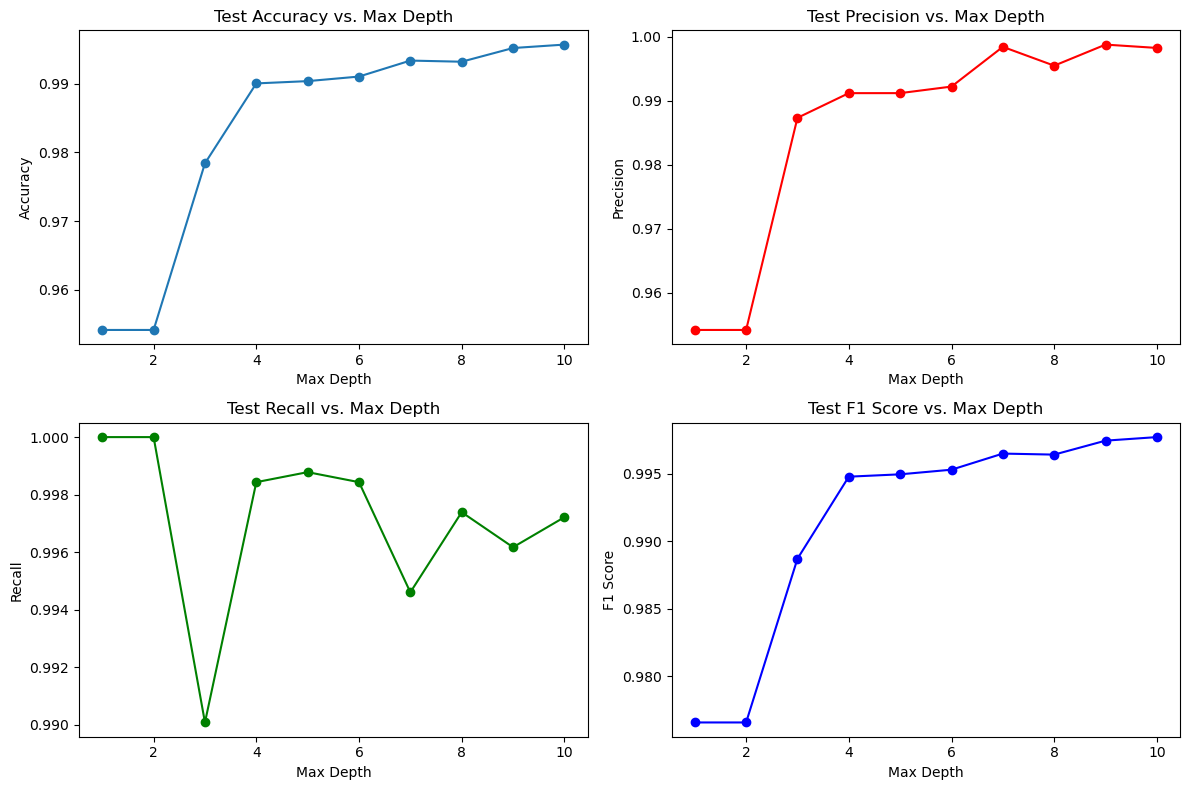

In [103]:
plt.figure(figsize=(12, 8))

# Accuracy plot
plt.subplot(2, 2, 1)
plt.plot(range(1, 11), test_accuracies, marker='o')
plt.title('Test Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

# Precision plot
plt.subplot(2, 2, 2)
plt.plot(range(1, 11), test_precisions, marker='o', color='r')
plt.title('Test Precision vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Precision')

# Recall plot
plt.subplot(2, 2, 3)
plt.plot(range(1, 11), test_recalls, marker='o', color='g')
plt.title('Test Recall vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Recall')

# F1 plot
plt.subplot(2, 2, 4)
plt.plot(range(1, 11), test_f1s, marker='o', color='b')
plt.title('Test F1 Score vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()

Really odd how the recall tanks at a depth of 3, 7, and 9

But mostly I am looking at how the metrics high values.

In [104]:
# Confusion Matrix for the best depth
best_depth = np.argmax(test_f1s) + 1  # depth with highest F1 score
#we add 1 because we started at 0
best_tree = build_tree(X_train, y_train, max_depth=best_depth) #based on our best depth we build a new tree
y_pred_best = np.array([predict_tree(best_tree, X_sample) for X_sample in X_test])

conf_matrix = confusion_matrix(y_test, y_pred_best)

In [105]:
print('Best depth:', best_depth) #well of course it is 10 
print(conf_matrix)

Best depth: 10
[[ 266   10]
 [  16 5732]]


In [106]:
#I came back up to this after doing testing below trying to understand the splits. Now I am getting help to write this function to print all the splits
def print_tree(node, depth=0):
    '''
    This function creates a neat visualization for decision trees
    It prints and indents each split that is made
    input:
        node: info from the tree containing thresholds, split features... (specific above in class initiazliation)
        depth: always 0 tells what depth we are currently at for printing the visualization
    output:
        lots of print statements
    '''
    indent = "  " * depth #creates indents for looks
    if node.value is not None: #If we have a value
        #This works because inside tree is a lot of nested nodes
        #so the print statement is printing each nested node one at a time when it reaches the if statement.
        print(f"{indent}Leaf node: Predict {node.value}") #print the value to the screen
    else:
        print(f"{indent}Depth {depth}: Split on feature /'{data.columns[node.feature]}/' at threshold {node.threshold}") #if no value add to the depth and print the split
        print_tree(node.left, depth + 1)
        print_tree(node.right, depth + 1)

In [107]:
tree = build_tree(X, y, max_depth=5)
print_tree(tree) #This function is really impressive. I like the use of spaces to indent really helps with visualization.

Depth 0: Split on feature /'Date (Yr. - 1980)/' at threshold 30.0
  Depth 1: Split on feature /'Date (Yr. - 1980)/' at threshold 29.0
    Depth 2: Split on feature /'Method/' at threshold 6.0
      Depth 3: Split on feature /'Method/' at threshold 5.0
        Depth 4: Split on feature /'redshift (z)/' at threshold 1.30658
          Leaf node: Predict 1
          Leaf node: Predict 1
        Leaf node: Predict 0
      Depth 3: Split on feature /'redshift (z)/' at threshold 0.00638
        Depth 4: Split on feature /'redshift (z)/' at threshold 0.005791
          Leaf node: Predict 1
          Leaf node: Predict 1
        Depth 4: Split on feature /'Date (Yr. - 1980)/' at threshold 28.0
          Leaf node: Predict 1
          Leaf node: Predict 1
    Depth 2: Split on feature /'D (Mpc)/' at threshold 1480.0
      Depth 3: Split on feature /'Method/' at threshold 6.0
        Depth 4: Split on feature /'Method/' at threshold 4.0
          Leaf node: Predict 1
          Leaf node: Predict 

Even just one split seems extremely effective so I'm going to look at what this split is.

In [108]:
# Get the first split from the tree
first_split = tree  # This is the root node of the tree
first_feature = first_split.feature
first_threshold = first_split.threshold
print(first_feature, first_threshold)
print(data.columns[first_feature])

5 30.0
Date (Yr. - 1980)


This makes a lot of sense. It seems after 2010 (30 yrs after 1980) It perhaps became standard to release this measurement with your data. It is entirely possible that the question being asked wasn't really necessary. I'm going to perform the analysis once more but omit the date column to see how the results change.

In [109]:
#Some of these print statements were used to check if stuff is working right
print(X[0])
X_new = np.delete(X, 5, axis=1) #deletes the date column
print(X_new[0])
index = np.where(data.drop(columns=["Date (Yr. - 1980)"])['Has Hubble'] != 1)
print((data.drop(columns=["Date (Yr. - 1980)"])['Has Hubble'].unique()))

[4.16400e+01 1.70000e-01 1.70000e+03 8.00000e+00 2.49917e-01 3.40000e+01]
[4.16400e+01 1.70000e-01 1.70000e+03 8.00000e+00 2.49917e-01]
[1. 0.]


In [110]:
tree = build_tree(X_new, y, max_depth=5)
print_tree(tree)

Depth 0: Split on feature /'redshift (z)/' at threshold 0.508995
  Depth 1: Split on feature /'Method/' at threshold 6.0
    Depth 2: Split on feature /'m-M/' at threshold 33.18
      Leaf node: Predict 0
      Depth 3: Split on feature /'Method/' at threshold 4.0
        Depth 4: Split on feature /'redshift (z)/' at threshold 0.451
          Leaf node: Predict 1
          Leaf node: Predict 0
        Depth 4: Split on feature /'err/' at threshold 0.08
          Leaf node: Predict 1
          Leaf node: Predict 1
    Depth 2: Split on feature /'redshift (z)/' at threshold 0.336879
      Depth 3: Split on feature /'redshift (z)/' at threshold 0.18195
        Depth 4: Split on feature /'redshift (z)/' at threshold 0.00638
          Leaf node: Predict 1
          Leaf node: Predict 1
        Depth 4: Split on feature /'redshift (z)/' at threshold 0.182
          Leaf node: Predict 0
          Leaf node: Predict 1
      Depth 3: Split on feature /'err/' at threshold 0.17
        Depth 4: S

The comments die down here because a lot of this is copy pasted from above and follows the same process

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
'''
WARNING TAKES ~1min TO RUN
'''
# List to store results
test_accuracies = []
test_precisions = []
test_recalls = []
test_f1s = []

'''This was copy pasted from above but I copy pasted it before I made the comments above
Uses the same comments as in above.'''
for depth in range(1, 11):
    # Train the decision tree
    tree = build_tree(X_train, y_train, max_depth=depth)
    
    # Predict on the test set
    y_pred_test = np.array([predict_tree(tree, X_sample) for X_sample in X_test])
    
    # Calculate metrics
    accuracy = np.mean(y_pred_test == y_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    
    # Store the results
    test_accuracies.append(accuracy)
    test_precisions.append(precision)
    test_recalls.append(recall)
    test_f1s.append(f1)

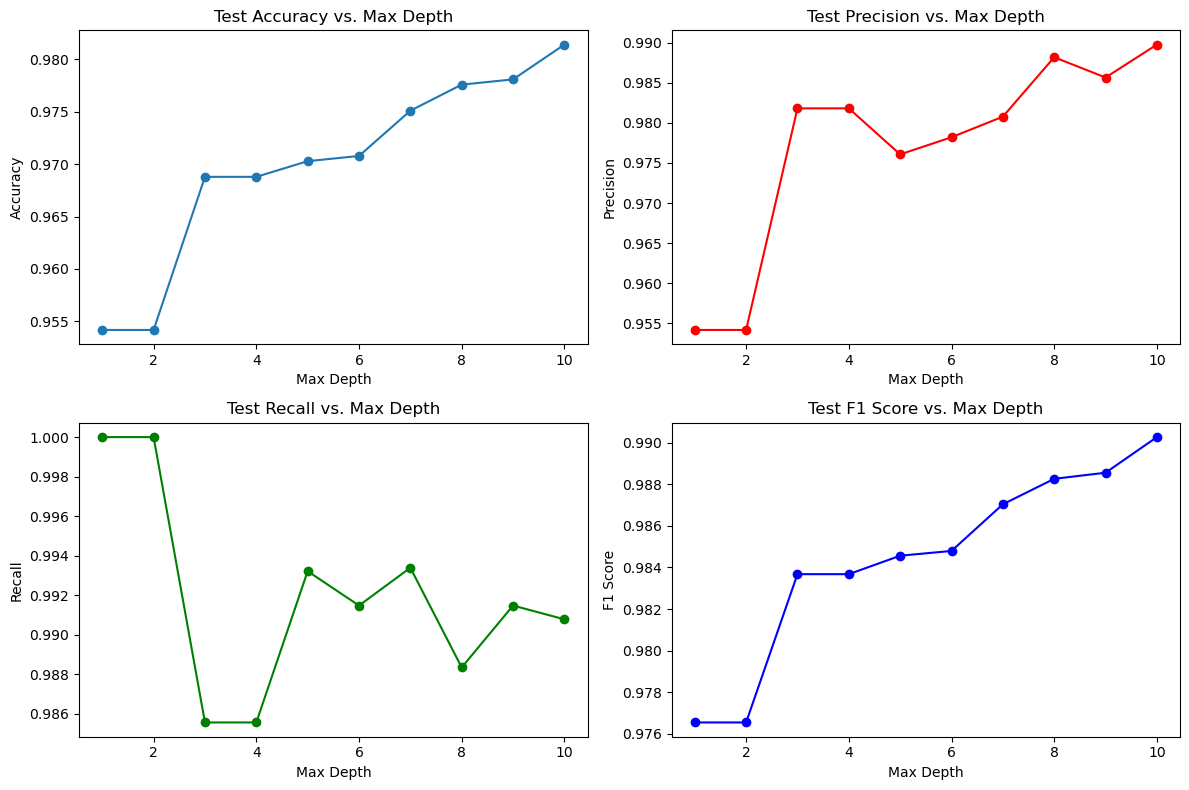

In [112]:
plt.figure(figsize=(12, 8))

# Accuracy plot
plt.subplot(2, 2, 1)
plt.plot(range(1, 11), test_accuracies, marker='o')
plt.title('Test Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')

# Precision plot
plt.subplot(2, 2, 2)
plt.plot(range(1, 11), test_precisions, marker='o', color='r')
plt.title('Test Precision vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Precision')

# Recall plot
plt.subplot(2, 2, 3)
plt.plot(range(1, 11), test_recalls, marker='o', color='g')
plt.title('Test Recall vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Recall')

# F1 plot
plt.subplot(2, 2, 4)
plt.plot(range(1, 11), test_f1s, marker='o', color='b')
plt.title('Test F1 Score vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()

In [113]:
# Confusion Matrix for the best depth
best_depth = np.argmax(test_f1s) + 1  # depth with highest F1 score
best_tree = build_tree(X_train, y_train, max_depth=best_depth)
y_pred_best = np.array([predict_tree(best_tree, X_sample) for X_sample in X_test])

conf_matrix = confusion_matrix(y_test, y_pred_best)
print('Best depth:', best_depth) #well of course it is 10 
print(conf_matrix)

Best depth: 10
[[ 217   59]
 [  53 5695]]


My prediction that they changed something around 2010 doesn't seem to be entirely true because we still have really good accuracy even after removing the date. I want to try one last thing to attempt at breaking the tree by removing the method column, perhaps in 2010 a new standard method was developed that resulted in it being easier to take these measurements.

In [114]:
#lots of copy and paste upcoming

# Get the first split from the tree
first_split = tree  # This is the root node of the tree
first_feature = first_split.feature
first_threshold = first_split.threshold
print(first_feature, first_threshold)
print(data.columns[first_feature])

4 0.508995
redshift (z)


Immediately my prediction is wrong because the first split occurs on redshift. I will not try removing any more features. These are very interesting results because it shows us that previous data can be a valid predictor of wether we can measure Hubble's constant. The Decision Trees visualizations although only text were very effective in showcasing how measurements impact our understanding of calculating Hubble's constant to the public. However, I think a more visual representation would also be helpful.

Citations:

I used ChatGPT to create these functions: https://chatgpt.com/share/6816d11c-ce24-8013-b57d-b6a4eec22488  (Functions are commented to show understanding)

I think ChatGPT was actually a really useful tool here. I spent so much time trying to understand what each line of code did that I feel that I understand this model better than some of the other models where I was using online resources and the textbook to build it. But obviously I only understand the code because I read through every line I see how easy it was to prompt it to create code and then copy and paste it without reading through it. 

(I also realized ChatGPT tends to put a space in comments # comment whereas I usually just do #comment)

Additionally this resource helped with some of the understanding and was similar to what ChatGPT produced: https://medium.com/@enozeren/building-a-decision-tree-from-scratch-324b9a5ed836